# Russia-Ukraine war - sentiment analysis for Bulgarian news articles

### Data set

The data set is fetched from several news agencies in Bulgarian language.

A custom crawler utilizing the `npm` package `crawler`, Google's `Puppeteer` and basic HTTP requests was created in order for the dataset to be collected. This was needed, because different websites had different requirements in order for the pages to render correctly. One of the websites had Cloudflare protection, which has bypassed by the `Puppeteer` part of the crawler.

`JSDOM` library was used for server-side DOM manipulation in order for the articles to be clean of clutter and unnecessary pieces of information - images, ads, tags, etc.

The websites' articles are classifed as follows:

**Pro - West**
- Mediapool - https://www.mediapool.bg/voina-v-ukraina-cat90.html
- Dnevnik - https://www.dnevnik.bg/ajax/section/temi/voinata_v_evropa/0/0
- Svobodna Evropa - https://www.svobodnaevropa.bg/s?k=%D1%83%D0%BA%D1%80%D0%B0%D0%B9%D0%BD%D0%B0&tab=all&pi=1&r=any&pp=20

**Pro - Russia**
- Blitz - https://blitz.bg/voinata?page=1
- Pogled Info - https://pogled.info/search/?q=%D1%83%D0%BA%D1%80%D0%B0%D0%B9%D0%BD%D0%B0
- Epicenter - https://epicenter.bg/search/%D1%83%D0%BA%D1%80%D0%B0%D0%B9%D0%BD%D0%B0/1
- Fakti - https://fakti.bg/search?q=%D1%83%D0%BA%D1%80%D0%B0%D0%B9%D0%BD%D0%B0&page=1
- Istinata - https://istinata.net/page/1/?s=%D1%83%D0%BA%D1%80%D0%B0%D0%B9%D0%BD%D0%B0
- V Chas - https://vchas.net/page/1/?s=%D1%83%D0%BA%D1%80%D0%B0%D0%B9%D0%BD%D0%B0


#### Source of inspiration:
- https://hssfoundation.org/wp-content/uploads/2022/06/%D0%94%D0%BE%D0%BA%D0%BB%D0%B0%D0%B4.-%D0%A0%D1%83%D1%81%D0%BA%D0%B0%D1%82%D0%B0-%D0%BF%D1%80%D0%BE%D0%BF%D0%B0%D0%B3%D0%B0%D0%BD%D0%B4%D0%B0.-%D0%92%D1%82%D0%BE%D1%80%D0%B0-%D1%87%D0%B0%D1%81%D1%82.pdf

### Example entry from the dataset

In [253]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

data = pd.read_json('./data-merged.json')

# Keeping only the neccessary columns
data = data[['title', 'text','sentiment']]

data.head()

,title,text,sentiment
0,Медведев заговори за трета световна война и от...,"""Ако избухне трета световна война, уви, тя ням...",pro-russian
1,"Русия увеличи корабите в Черно море, вече може...",Русия е увеличила броя на корабите в Черно мор...,pro-russian
2,Таролог с прогноза за ключов момент във войнат...,Украинците са все по-изплашени от циркулиращит...,pro-russian
3,ВИДЕО от войната: ВСУ удари с HIMARS болница в...,Въоръжените сили на Украйна са обстрелвали гра...,pro-russian
4,Шолц посочи целта на Германия за Украйна,Целта на Германия е да не допусне разширяванет...,pro-russian


# Preparing the data

In [254]:
X = data.drop(['sentiment'], axis=1)

y = data['sentiment']

### Removing Stop words


Stop words used:

In [297]:
import json
  
stop_words_file = open('./stopwords.json', encoding='utf-8')

stop = json.load(stop_words_file)
stop_words_file.close()

print(stop)

['а', 'автентичен', 'аз', 'ако', 'ала', 'бе', 'без', 'беше', 'би', 'бивш', 'бивша', 'бившо', 'бил', 'била', 'били', 'било', 'благодаря', 'близо', 'бъдат', 'бъде', 'бяха', 'в', 'вас', 'ваш', 'ваша', 'вероятно', 'вече', 'взема', 'ви', 'вие', 'винаги', 'внимава', 'време', 'все', 'всеки', 'всички', 'всичко', 'всяка', 'във', 'въпреки', 'върху', 'г', 'ги', 'главен', 'главна', 'главно', 'глас', 'го', 'година', 'години', 'годишен', 'д', 'да', 'дали', 'два', 'двама', 'двамата', 'две', 'двете', 'ден', 'днес', 'дни', 'до', 'добра', 'добре', 'добро', 'добър', 'докато', 'докога', 'дори', 'досега', 'доста', 'друг', 'друга', 'други', 'е', 'евтин', 'едва', 'един', 'една', 'еднаква', 'еднакви', 'еднакъв', 'едно', 'екип', 'ето', 'живот', 'за', 'забавям', 'зад', 'заедно', 'заради', 'засега', 'заспал', 'затова', 'защо', 'защото', 'и', 'из', 'или', 'им', 'има', 'имат', 'иска', 'й', 'каза', 'как', 'каква', 'какво', 'както', 'какъв', 'като', 'кога', 'когато', 'което', 'които', 'кой', 'който', 'колко', 'която

### Removal of the stop words:

In [256]:
# Actual removal of stop words
X['text'] = X['text'].apply(lambda x: ' '.join([word.lower() for word in x.split()]))
X['text'] = X['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

X['title'] = X['title'].apply(lambda x: ' '.join([word.lower() for word in x.split()]))
X['title'] = X['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

### Stemming with BulStemmer

In [257]:
from bulstem.stem import BulStemmer

stemmer = BulStemmer.from_file('stem_rules_context_2_UTF-8.txt', min_freq=2, left_context=2)


X['text'] = X['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
X['title'] = X['title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

print(X['text']);
print(X['title'])

0       "ако избухн трета светов война, уви, танк изтр...
1       руси увелич броя кораб черн море 16 единици. о...
2       украин по-изплаш циркулира информации, руси го...
3       въоръж сили укра обстрелв град новоайдар луган...
4       целт герма допусн разширяван грани руси "изпол...
                              ...                        
1726    същот отдел ноемвр обем стокообме страни възли...
1727    съедин американск щати предлож различ модел пр...
1728    извест астроло дмитри ура прогноз съдб укра ид...
1729    мирът укра завис сащ, украин воюва американ пр...
1730    руск нашествени обстрелв цент херсон, уби пети...
Name: text, Length: 1731, dtype: object
0         медведев заговор трета светов войн отсече: е...
1         руси увелич кораб черн море, изстрел украйна...
2                   тароло прогноз ключов момент войната,
3       видео войната: всу удар himars болниц луганск ...
4                              шолц посоч целт герма укра
                              ..

# Defining some utility functions

In [258]:
def average(lst):
    return sum(lst) / len(lst)

import matplotlib.pyplot as plt

def plot_accuracy(title, accuracy_per_fold, average_accuracy_per_fold):
    # x axis values
    x_plot = []
    for fold_index, _ in enumerate(accuracy_per_fold):
        x_plot.append(fold_index + 1)
    # corresponding y axis values
    y_plot = accuracy_per_fold
    
    # plotting the points 
    plt.plot(x_plot, y_plot)
    
    # naming the x axis
    plt.xlabel('Fold #')
    # naming the y axis
    plt.ylabel('Accuracy')

    plt.grid(True)

    plt.axhline(y = average_accuracy_per_fold, color = 'r', linestyle = '-', label = 'Average (%f)' % average_accuracy_per_fold)

    # plotting the legend
    plt.legend(bbox_to_anchor = (.22, 1), loc = 'upper center')
    
    # giving a title to my graph
    plt.title(title)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def find_optimal_k(X_train, y_train, myList):
   
    #creating odd list of K for KNN
    #myList = list(range(0,40))
    neighbors = list(filter(lambda x: x % 2 != 0, myList))

    # empty list that will hold cv scores
    cv_scores = []

    # perform 10-fold cross validation
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)


    plt.figure(figsize=(10,6))
    plt.plot(list(filter(lambda x: x % 2 != 0, myList)),MSE,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')

    print('The misclassification error for each k value is : ', np.round(MSE,3))
    
    return optimal_k

# Defining some common imports

In [259]:
# split X and y into training and testing sets
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
from sklearn import metrics

import category_encoders as ce

# One-hot encoding of words

## Gaussian Native Bayes

In [260]:
from sklearn.naive_bayes import GaussianNB

kf = KFold(n_splits=5, shuffle=True, random_state=42)

gnb_accuracy_per_fold = []

# split()  method generate indices to split data into training and test set.
for fold_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f'Fold:{fold_index + 1}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # display categorical variables
    categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

    encoder = ce.OneHotEncoder(cols=categorical)

    X_train = encoder.fit_transform(X_train)
    X_test = encoder.transform(X_test)

    cols = X_train.columns

    scaler = RobustScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    X_train = pd.DataFrame(X_train, columns=[cols])
    X_test = pd.DataFrame(X_test, columns=[cols])


    # instantiate the model
    gnb = GaussianNB()


    # fit the model
    gnb.fit(X_train.values, y_train)

    y_pred = gnb.predict(X_test.values)

    gnb_accuracy_per_fold.append(metrics.accuracy_score(y_test, y_pred));

Fold:1, Train set: 1384, Test set:347
Fold:2, Train set: 1385, Test set:346
Fold:3, Train set: 1385, Test set:346
Fold:4, Train set: 1385, Test set:346
Fold:5, Train set: 1385, Test set:346


In [261]:
gnb_accuracy_per_fold

[0.4956772334293948,
 0.5202312138728323,
 0.523121387283237,
 0.4624277456647399,
 0.5433526011560693]

In [262]:
gnb_average_accuracy_per_fold = average(gnb_accuracy_per_fold)

print("Average accuracy: ", gnb_average_accuracy_per_fold)

Average accuracy:  0.5089620362812546


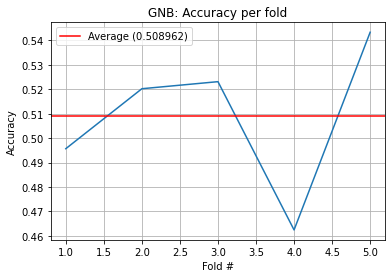

In [263]:
plot_accuracy('GNB: Accuracy per fold', gnb_accuracy_per_fold, gnb_average_accuracy_per_fold)

## k Nearest Neighbours


The optimal number of neighbors is 3.
the misclassification error for each k value is :  [0.291 0.29  0.493 0.493 0.496 0.512 0.531 0.552 0.569 0.573 0.573 0.573
 0.573 0.573 0.569 0.555 0.556 0.572 0.573 0.573 0.573 0.577 0.584 0.584
 0.584]
Fold:1, Train set: 1384, Test set:347
Fold:2, Train set: 1385, Test set:346
Fold:3, Train set: 1385, Test set:346
Fold:4, Train set: 1385, Test set:346
Fold:5, Train set: 1385, Test set:346


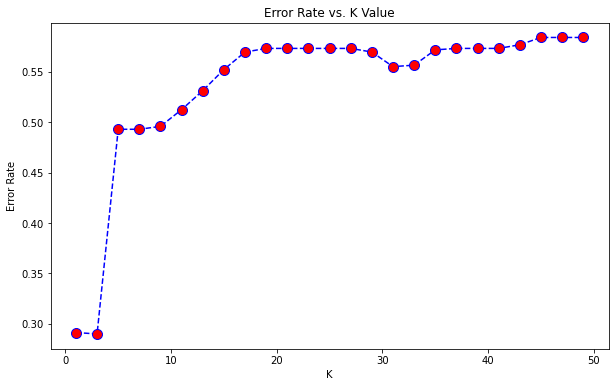

In [264]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

kNN_accuracy_per_fold = []

train_index, test_index = next(kf.split(X, y))

X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y[train_index], y[test_index]

# display categorical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

encoder = ce.OneHotEncoder(cols=categorical)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

k_range = list(range(0,50))

optimal_k = find_optimal_k(X_train, y_train, k_range)

# split()  method generate indices to split data into training and test set.
for fold_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f'Fold:{fold_index + 1}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # display categorical variables
    categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

    encoder = ce.OneHotEncoder(cols=categorical)

    X_train = encoder.fit_transform(X_train)
    X_test = encoder.transform(X_test)

    cols = X_train.columns

    scaler = RobustScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    X_train = pd.DataFrame(X_train, columns=[cols])
    X_test = pd.DataFrame(X_test, columns=[cols])


    # instantiate the model
    kNN = KNeighborsClassifier(n_neighbors=3)


    # fit the model
    kNN.fit(X_train.values, y_train)

    y_pred = kNN.predict(X_test.values)

    kNN_accuracy_per_fold.append(metrics.accuracy_score(y_test, y_pred));

In [265]:
kNN_accuracy_per_fold

[0.7146974063400576,
 0.7254335260115607,
 0.6936416184971098,
 0.7976878612716763,
 0.6936416184971098]

In [266]:
kNN_average_accuracy_per_fold = average(kNN_accuracy_per_fold)

print("Average accuracy: ", kNN_average_accuracy_per_fold)

Average accuracy:  0.7250204061235029


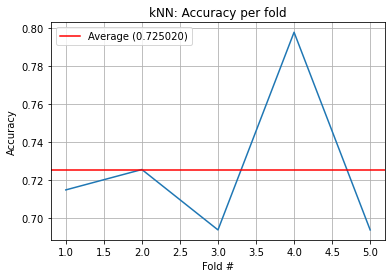

In [267]:
plot_accuracy('kNN: Accuracy per fold', kNN_accuracy_per_fold, kNN_average_accuracy_per_fold)

## Support-Vector machines

In [268]:
from sklearn.svm import SVC

kf = KFold(n_splits=5, shuffle=True, random_state=42)

SVM_accuracy_per_fold = []

# split()  method generate indices to split data into training and test set.
for fold_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f'Fold:{fold_index + 1}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # display categorical variables
    categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

    encoder = ce.OneHotEncoder(cols=categorical)

    X_train = encoder.fit_transform(X_train)
    X_test = encoder.transform(X_test)

    cols = X_train.columns

    scaler = RobustScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    X_train = pd.DataFrame(X_train, columns=[cols])
    X_test = pd.DataFrame(X_test, columns=[cols])


    # instantiate the model
    svm = SVC()

    # fit the model
    svm.fit(X_train.values, y_train)

    y_pred = svm.predict(X_test.values)

    SVM_accuracy_per_fold.append(metrics.accuracy_score(y_test, y_pred));

Fold:1, Train set: 1384, Test set:347
Fold:2, Train set: 1385, Test set:346
Fold:3, Train set: 1385, Test set:346
Fold:4, Train set: 1385, Test set:346
Fold:5, Train set: 1385, Test set:346


In [269]:
SVM_average_accuracy_per_fold = average(SVM_accuracy_per_fold)

print("Average accuracy: ", SVM_average_accuracy_per_fold)

Average accuracy:  0.7250204061235029


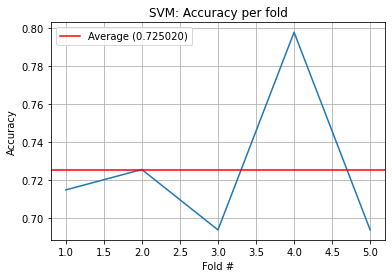

In [270]:
plot_accuracy('SVM: Accuracy per fold', SVM_accuracy_per_fold, SVM_average_accuracy_per_fold)

## Decision trees

In [271]:
from sklearn.tree import DecisionTreeClassifier

kf = KFold(n_splits=5, shuffle=True, random_state=42)

DT_accuracy_per_fold = []

# split()  method generate indices to split data into training and test set.
for fold_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f'Fold:{fold_index + 1}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # display categorical variables
    categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

    encoder = ce.OneHotEncoder(cols=categorical)

    X_train = encoder.fit_transform(X_train)
    X_test = encoder.transform(X_test)

    cols = X_train.columns

    scaler = RobustScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    X_train = pd.DataFrame(X_train, columns=[cols])
    X_test = pd.DataFrame(X_test, columns=[cols])


    # instantiate the model
    dt = DecisionTreeClassifier(random_state=0)

    # fit the model
    dt.fit(X_train.values, y_train)

    y_pred = dt.predict(X_test.values)

    DT_accuracy_per_fold.append(metrics.accuracy_score(y_test, y_pred));

Fold:1, Train set: 1384, Test set:347
Fold:2, Train set: 1385, Test set:346
Fold:3, Train set: 1385, Test set:346
Fold:4, Train set: 1385, Test set:346
Fold:5, Train set: 1385, Test set:346


In [272]:
DT_average_accuracy_per_fold = average(DT_accuracy_per_fold)

print("Average accuracy: ", DT_average_accuracy_per_fold)

Average accuracy:  0.7273308790458264


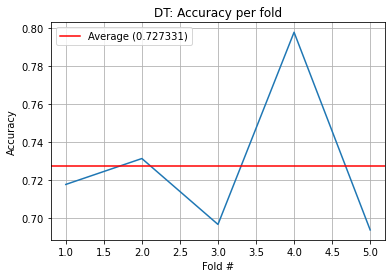

In [273]:
plot_accuracy('DT: Accuracy per fold', DT_accuracy_per_fold, DT_average_accuracy_per_fold)

# Bag of words approach


### Initial preparation

In [274]:
from sklearn.feature_extraction.text import CountVectorizer

X_bag = X[["title", "text"]].apply(" ".join, axis=1)
y_bag = y;

print(X_bag)
print(y_bag)

0       медведев заговор трета светов войн отсече: е.....
1       руси увелич кораб черн море, изстрел украйна.....
2       тароло прогноз ключов момент войната, украин п...
3       видео войната: всу удар himars болниц луганск ...
4       шолц посоч целт герма укра целт герма допусн р...
                              ...                        
1726    кита загърб украйна, данн показват, че… същот ...
1727    wp: вашингтон допусн сценар за... съедин амери...
1728    астроло черн прогноз укра в... извест астроло ...
1729    орбан: мирът укра завис сащ, не... мирът укра ...
1730    боев укра продължава навечерието... руск нашес...
Length: 1731, dtype: object
0       pro-russian
1       pro-russian
2       pro-russian
3       pro-russian
4       pro-russian
           ...     
1726    pro-russian
1727    pro-russian
1728    pro-russian
1729    pro-russian
1730    pro-russian
Name: sentiment, Length: 1731, dtype: object


In [275]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.naive_bayes import MultinomialNB

mnb_accuracy_per_fold = []

# split()  method generate indices to split data into training and test set.
for fold_index, (train_index, test_index) in enumerate(kf.split(X_bag, y_bag)):
    print(f'Fold:{fold_index + 1}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    X_train, X_test = X_bag.iloc[train_index], X_bag.iloc[test_index]
    y_train, y_test = y_bag[train_index], y_bag[test_index]

    vect = CountVectorizer()

    X_train = vect.fit_transform(X_train)
    X_test = vect.transform(X_test)

    # instantiate the model
    mnb = MultinomialNB()


    # fit the model
    mnb.fit(X_train, y_train)

    y_pred = mnb.predict(X_test)

    mnb_accuracy_per_fold.append(metrics.accuracy_score(y_test, y_pred));

Fold:1, Train set: 1384, Test set:347
Fold:2, Train set: 1385, Test set:346
Fold:3, Train set: 1385, Test set:346
Fold:4, Train set: 1385, Test set:346
Fold:5, Train set: 1385, Test set:346


In [276]:
mnb_average_accuracy_per_fold = average(mnb_accuracy_per_fold)

print("Average accuracy: ", mnb_average_accuracy_per_fold)

Average accuracy:  0.8324748879745464


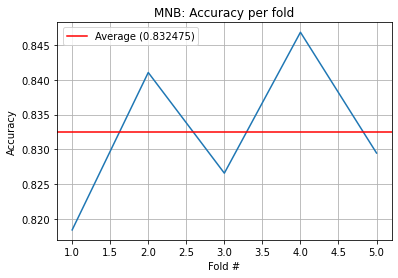

In [277]:
plot_accuracy('MNB: Accuracy per fold', mnb_accuracy_per_fold, mnb_average_accuracy_per_fold)


The optimal number of neighbors is 3.
the misclassification error for each k value is :  [0.255 0.252 0.255 0.255 0.265 0.279 0.301 0.342 0.365 0.374 0.371 0.375
 0.373 0.37  0.381 0.38  0.384 0.383 0.385 0.383 0.384 0.384 0.387 0.387
 0.385]
Fold:1, Train set: 1384, Test set:347
Fold:2, Train set: 1385, Test set:346
Fold:3, Train set: 1385, Test set:346
Fold:4, Train set: 1385, Test set:346
Fold:5, Train set: 1385, Test set:346


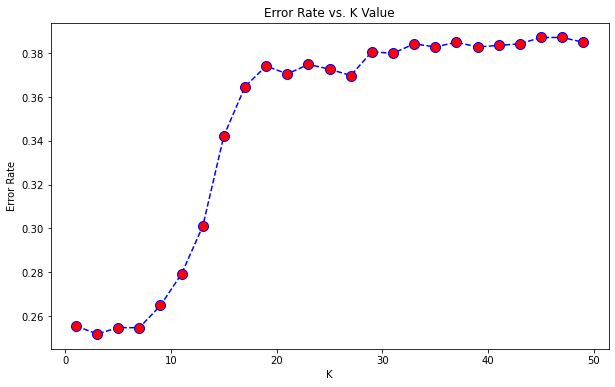

In [286]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

bw_kNN_accuracy_per_fold = []

train_index, test_index = next(kf.split(X_bag, y_bag))
X_train, X_test = X_bag.iloc[train_index], X_bag.iloc[test_index]
y_train, y_test = y_bag[train_index], y_bag[test_index]

vect = CountVectorizer()

X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

k_range = list(range(0,50))

optimal_k = find_optimal_k(X_train, y_train, k_range)

# split()  method generate indices to split data into training and test set.
for fold_index, (train_index, test_index) in enumerate(kf.split(X_bag, y_bag)):
    print(f'Fold:{fold_index + 1}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    X_train, X_test = X_bag.iloc[train_index], X_bag.iloc[test_index]
    y_train, y_test = y_bag[train_index], y_bag[test_index]

    vect = CountVectorizer()

    X_train = vect.fit_transform(X_train)
    X_test = vect.transform(X_test)

    # instantiate the model
    kNN = KNeighborsClassifier(n_neighbors=optimal_k)


    # fit the model
    kNN.fit(X_train, y_train)

    y_pred = kNN.predict(X_test)

    bw_kNN_accuracy_per_fold.append(metrics.accuracy_score(y_test, y_pred));

In [287]:
bw_kNN_average_accuracy_per_fold = average(bw_kNN_accuracy_per_fold)

print("Average accuracy: ", bw_kNN_average_accuracy_per_fold)

Average accuracy:  0.7521847045693058


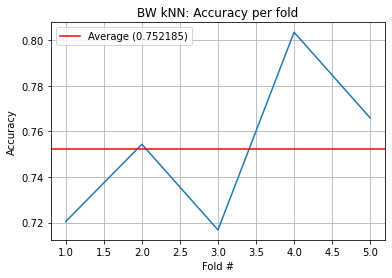

In [288]:
plot_accuracy('BW kNN: Accuracy per fold', bw_kNN_accuracy_per_fold, bw_kNN_average_accuracy_per_fold)

# Comparison of the different approaches

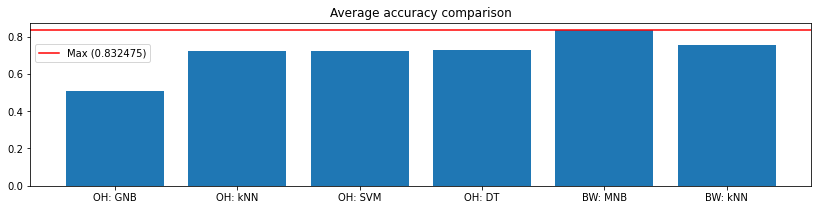

In [290]:
plt.figure(figsize=(14, 3))
comparison_chart_columns = ['OH: GNB', 'OH: kNN', 'OH: SVM', 'OH: DT', 'BW: MNB', 'BW: kNN']
comparison_chart_values = [gnb_average_accuracy_per_fold, kNN_average_accuracy_per_fold, SVM_average_accuracy_per_fold, DT_average_accuracy_per_fold, mnb_average_accuracy_per_fold, bw_kNN_average_accuracy_per_fold]
plt.bar(comparison_chart_columns, comparison_chart_values)
plt.title('Average accuracy comparison')

plt.axhline(y = max(comparison_chart_values), color = 'r', linestyle = '-', label = 'Max (%f)' % max(comparison_chart_values))
# plotting the legend
plt.legend(bbox_to_anchor = (.08, 0.9), loc = 'upper center')